Clustering the aspects, and looking at their distribution among the data instances. 

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from sklearn.decomposition import PCA
import nltk 
nltk.download('stopwords')
plt.rcParams["figure.figsize"] = (15,6)

[nltk_data] Downloading package stopwords to /home/faten/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Clustering

In [15]:
from scipy.spatial.distance import cdist

def get_tfidf(language, data):
    if language == "english":
        stop_words = stopwords.words('english')
    elif language == "german": 
        stop_words = stopwords.words('german')
    else: 
        raise language + " is not supported."

    # Vectorizer 
    vectorizer = TfidfVectorizer(
        max_df=0.9,
        min_df=0.01,
        stop_words=stop_words,
    )

    X_tfidf = vectorizer.fit_transform(data)
    print(f"n_samples: {X_tfidf.shape[0]}, n_features: {X_tfidf.shape[1]}")

    return X_tfidf


def plot_elbow(X_tfidf, title, language, save_plot=True):
    X_pca = PCA(n_components=2).fit_transform(X_tfidf.toarray())

    fig, ax = plt.subplots(1, 1)
    wcss = []
    distortions = []
    max=11
    for i in range(1, max):
        kmeans = KMeans(
            n_clusters=i, 
            init='k-means++', 
            random_state=42)
        kmeans.fit(X_pca)
        wcss.append(kmeans.inertia_) 
        
    ax.plot(range(1, max), wcss, marker='o', linestyle='--')    
    
    ax.title.set_text(title)
    ax.set_ylabel("WCSS")
    ax.set_xlabel("Number of Clusters")
    ax.grid(True)
    if save_plot:
        ax.get_figure().savefig("figures/clust_elbow_"+language, bbox_inches="tight") 

def cluster(X_tfidf, k, title, language, save_plot=True):
    X_pca = PCA(n_components=2).fit_transform(X_tfidf.toarray())
    
    kmeans= KMeans(
        n_clusters=k,
        max_iter=100,
        n_init=3,
        random_state=42,
    ).fit(X_pca) 

    cluster_ids, cluster_sizes = np.unique(kmeans.labels_, return_counts=True)
    print(f"Number of elements assigned to each cluster: {cluster_sizes}") 

    # Plotting
    fig, ax = plt.subplots(1, 1)
    for cluster in range(k):
        ax.scatter(X_pca[kmeans.labels_ == cluster, 0], X_pca[kmeans.labels_ == cluster, 1], label=f'Cluster {cluster+1}')
    ax.title.set_text(title)
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    # plt.legend()
    plt.show()
    if save_plot:
        ax.get_figure().savefig("figures/clusters_"+language, bbox_inches="tight") 

<hr>

n_samples: 43614, n_features: 62


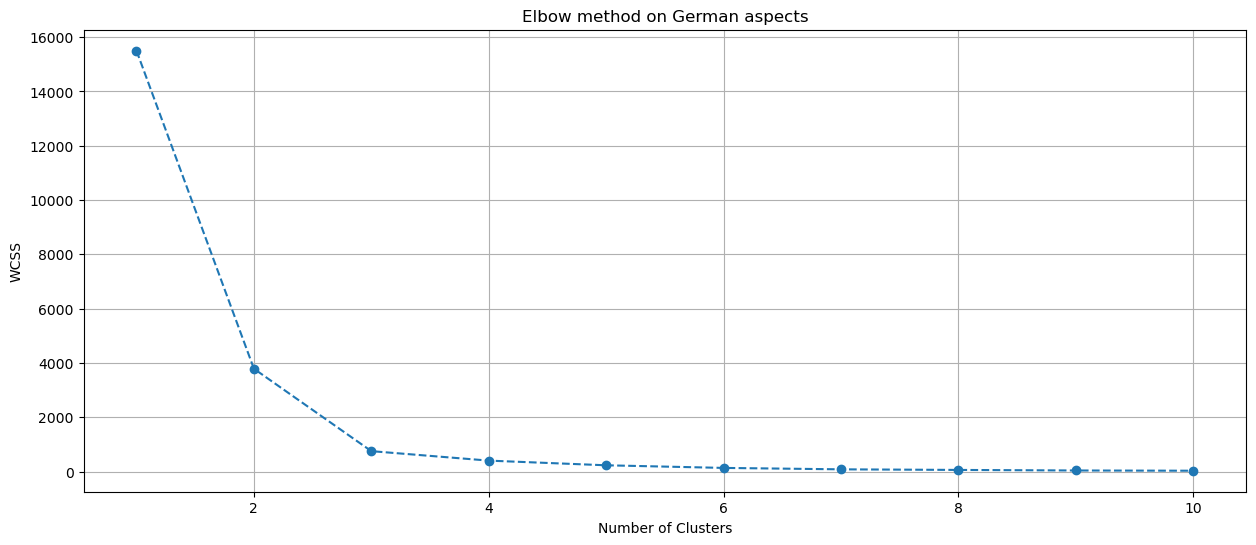

In [16]:
df = pd.read_csv("data/aspects_DE.csv")
df.dropna(subset=["description"], inplace=True)
data = df["description"] 
X_tfidf = get_tfidf(language="german", data=data) 
plot_elbow(X_tfidf=X_tfidf, title="Elbow method on German aspects", language="DE", save_plot=False)

Number of elements assigned to each cluster: [17694 12574 13346]


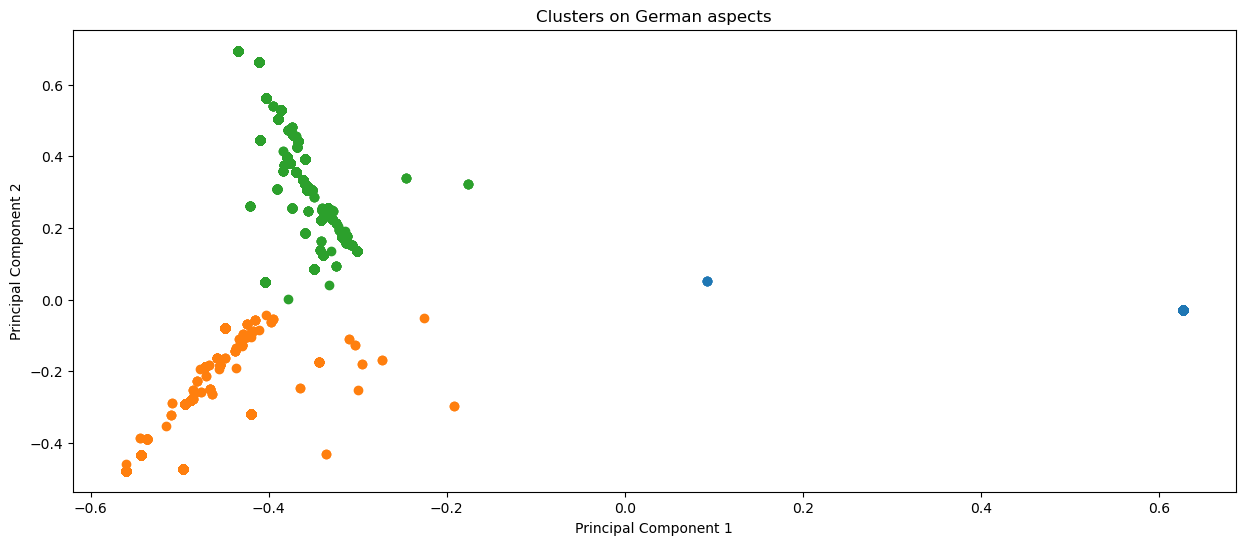

In [17]:
cluster(X_tfidf=X_tfidf, k=3, title="Clusters on German aspects", language="DE", save_plot=False)

<hr>

n_samples: 7324, n_features: 89


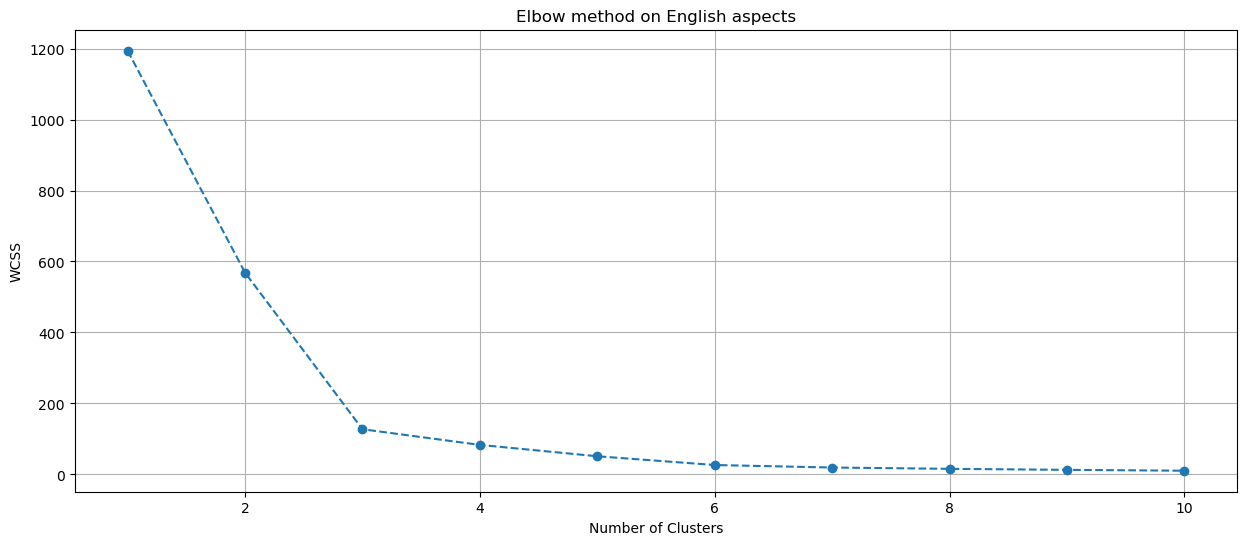

In [18]:
df = pd.read_csv("data/aspects_EN.csv")
df.dropna(subset=["description"], inplace=True)
data = df["description"] 
X_tfidf = get_tfidf(language="english", data=data) 
plot_elbow(X_tfidf=X_tfidf, title="Elbow method on English aspects", language="EN", save_plot=False)

Number of elements assigned to each cluster: [5352  675 1297]


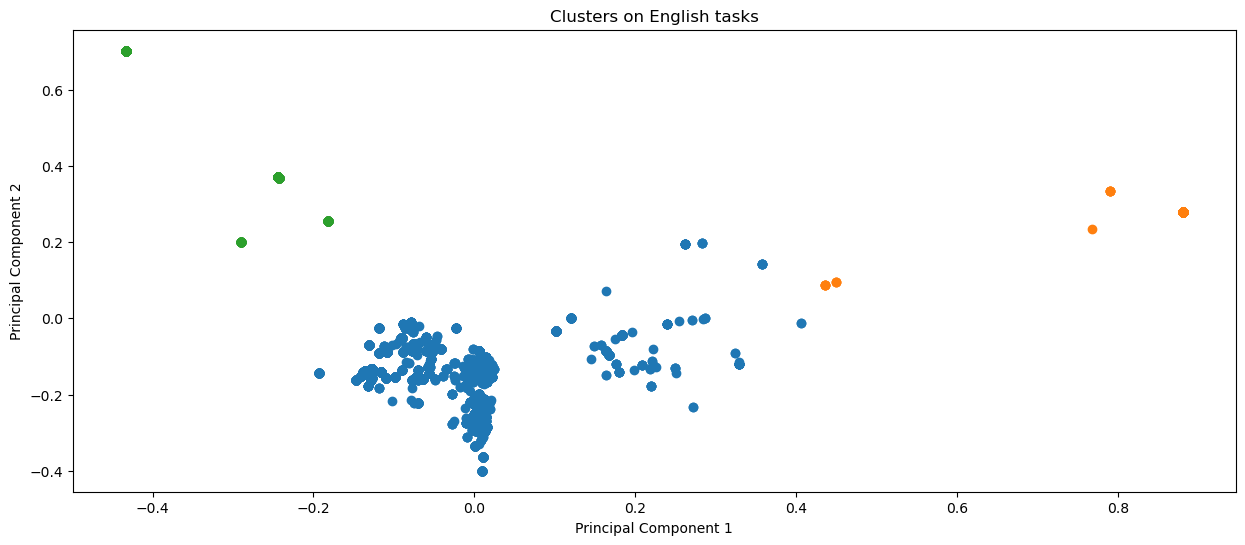

In [19]:
cluster(X_tfidf=X_tfidf, k=3, title="Clusters on English tasks", language="EN", save_plot=False)

<hr>

# Distribution

In [10]:
import seaborn as sns

### German

In [29]:
df = pd.read_csv("data/aspects_DE.csv")
df.head()

,taskId,aspectId,name,description,categoryId,type,groupId
0,6GiDAn1lXN77UqQybxaa1N,8063,contains too little/753,Bitte zähle noch weitere Möbel und Einrichtung...,NaN,MISCONCEPTION,NaN
1,6GiDAn1lXN77UqQybxaa1N,8067,is contained/749,Es wurden genügend Möbel und Einrichtungsgegen...,NaN,CONCEPT,NaN
2,1N8fnGOxojM7uMBAfjldQO,8067,is contained/749,Es wurden genügend Möbel und Einrichtungsgegen...,NaN,CONCEPT,NaN
3,6GiDAn1lXN77UqQybxaa1N,8075,is not contained/750,Es wurden keine Möbel und Einrichtungsgegenstä...,NaN,MISCONCEPTION,NaN
4,2nrIbSGCnBTaitH65i7FqT,7656,is contained/796,"Der Satz beginnt mit ""Nein"".",NaN,CONCEPT,NaN


In [30]:
len(df["taskId"].unique()), len(df["aspectId"].unique())

(1067, 2792)

**How many aspects per task?**

In [31]:
freq_df = df[["taskId", "aspectId"]].groupby(by="taskId").count().reset_index().rename(columns={"aspectId":"aspects_count"})

<Axes: xlabel='aspects_count', ylabel='Count'>

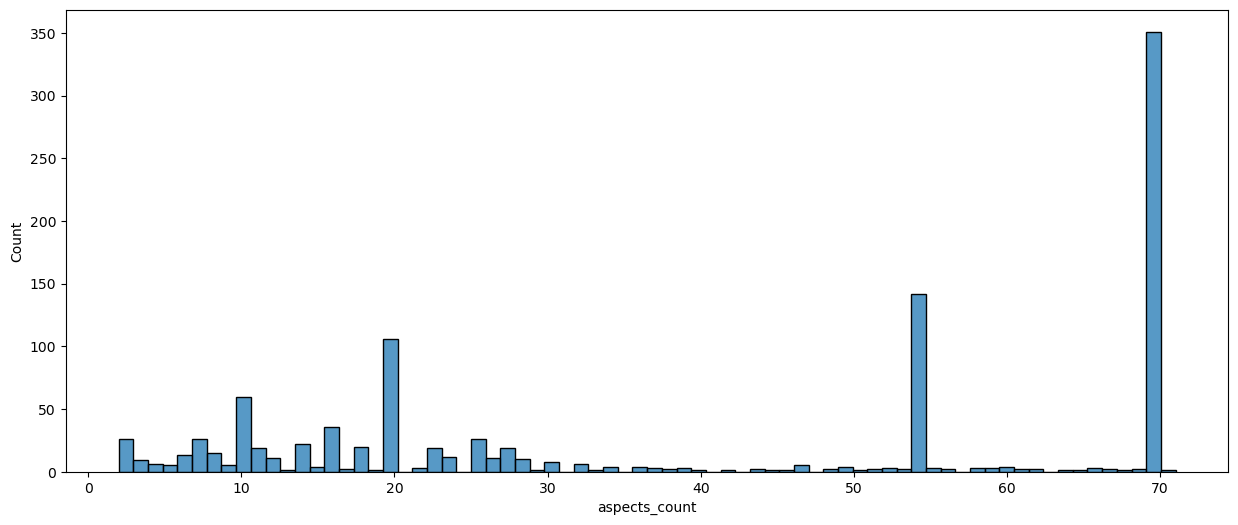

In [56]:
sns.histplot(data=freq_df, x="aspects_count", bins=72)


In [33]:
freq_df['aspects_count'].mean()

41.11902530459231

In [34]:
freq_df['aspects_count'].median()

49.0

**The most frequent aspects**

In [35]:
df.head()

,taskId,aspectId,name,description,categoryId,type,groupId
0,6GiDAn1lXN77UqQybxaa1N,8063,contains too little/753,Bitte zähle noch weitere Möbel und Einrichtung...,NaN,MISCONCEPTION,NaN
1,6GiDAn1lXN77UqQybxaa1N,8067,is contained/749,Es wurden genügend Möbel und Einrichtungsgegen...,NaN,CONCEPT,NaN
2,1N8fnGOxojM7uMBAfjldQO,8067,is contained/749,Es wurden genügend Möbel und Einrichtungsgegen...,NaN,CONCEPT,NaN
3,6GiDAn1lXN77UqQybxaa1N,8075,is not contained/750,Es wurden keine Möbel und Einrichtungsgegenstä...,NaN,MISCONCEPTION,NaN
4,2nrIbSGCnBTaitH65i7FqT,7656,is contained/796,"Der Satz beginnt mit ""Nein"".",NaN,CONCEPT,NaN


<Axes: xlabel='aspectId', ylabel='Count'>

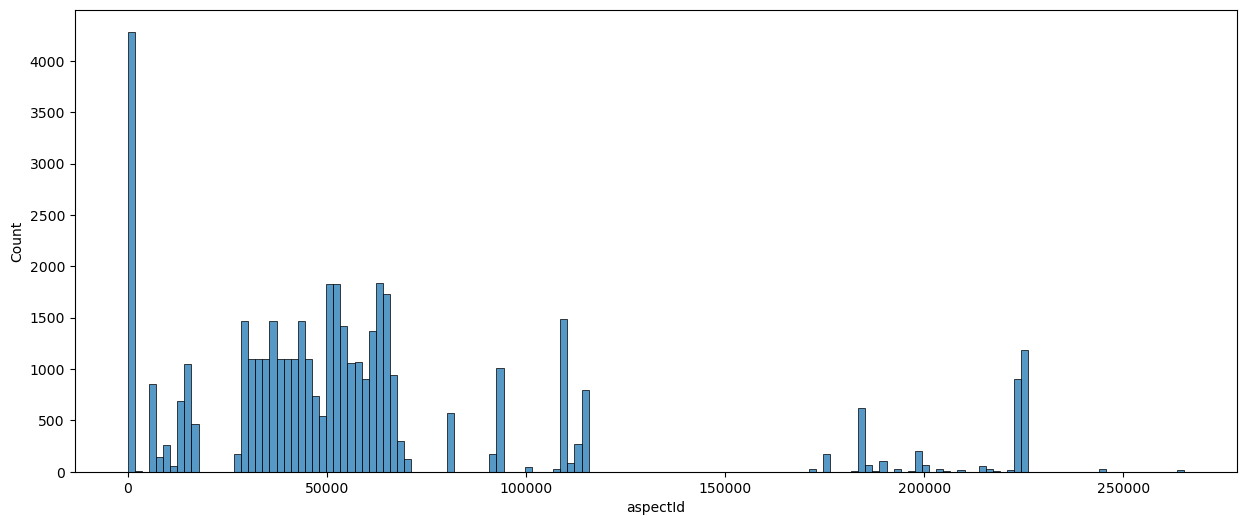

In [36]:
sns.histplot(data=df, x="aspectId")

**Co-occurrence**

In [43]:
occ_df = df[["taskId", "aspectId"]].groupby(by="taskId")["aspectId"].apply(list).reset_index().rename(columns={"aspectId":"aspectIds"})
occ_df.head()

,taskId,aspectIds
0,11TmPwiOxTraHRLHAisXsd,"[81254, 223298, 81242, 92638, 92639, 92640, 10..."
1,1293GBkjDYEaXvgdCO44iO,"[71033, 71034]"
2,13UI7608E2c6uSrPNzIeD8,"[114630, 184384, 114567, 184389, 184394, 11454..."
3,14z4iMHY2C59ksyPre5OWh,"[6095, 6096, 6097, 6098, 6099, 6100, 6101, 624..."
4,15lJTTd7ChCah9fCEQs7Sk,"[1415, 1631, 1417, 1416, 1418, 1419, 1632, 161..."


In [48]:
data = {'A': [['a', 'b'], ['b', 'c', 'd'], ['a', 'b', 'c'], ['c']]}
series = pd.Series(data['A']) 
series

0       [a, b]
1    [b, c, d]
2    [a, b, c]
3          [c]
dtype: object

In [51]:
all_elements = set([item for sublist in series for item in sublist])
list(all_elements)

['c', 'a', 'b', 'd']

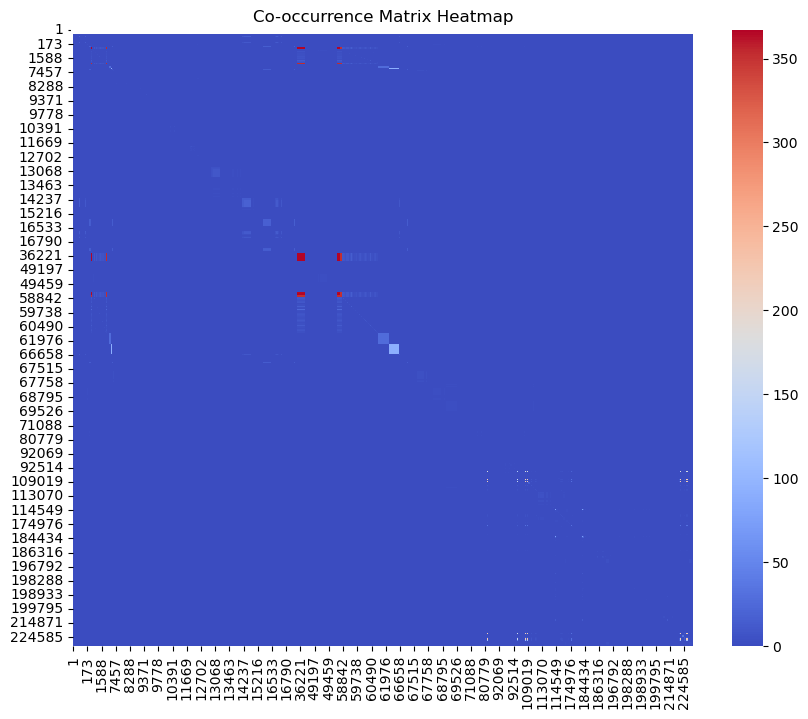

In [57]:
from itertools import combinations
from collections import Counter
import matplotlib.pyplot as plt

series = occ_df["aspectIds"]

# Extract all unique elements
all_elements = set([item for sublist in series for item in sublist])

# Initialize the co-occurrence matrix
co_occurrence_matrix = pd.DataFrame(0, index=sorted(list(all_elements)), columns=sorted(list(all_elements)))

# Populate the matrix
for sublist in series:
    for item1, item2 in combinations(sublist, 2):
        co_occurrence_matrix.loc[item1, item2] += 1
        co_occurrence_matrix.loc[item2, item1] += 1

# Diagonal elements should represent the occurrence of individual items
for sublist in series:
    for item in sublist:
        co_occurrence_matrix.loc[item, item] += 1

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(co_occurrence_matrix, annot=True, cmap='coolwarm', fmt='d')
plt.title('Co-occurrence Matrix Heatmap')
plt.show()


### English 

In [21]:
df = pd.read_csv("data/aspects_EN.csv")
df.head()

,taskId,aspectId,name,description,categoryId,type,groupId
0,arpZLB27MYq9MWTotPuJAy,7891,contains too little/1223,You mentioned not enough statements.,NaN,MISCONCEPTION,NaN
1,arpZLB27MYq9MWTotPuJAy,7893,wrong statement/1221,This sentences doesn't refer to the impact sta...,NaN,MISCONCEPTION,NaN
2,arpZLB27MYq9MWTotPuJAy,7892,correct statement/1220,You correctly identified the impact statement.,NaN,CONCEPT,NaN
3,RfcCuYoNUe7RBgytJfh1F,7979,contains too little/1461,You mentioned the importance of giving praise....,NaN,MISCONCEPTION,NaN
4,RfcCuYoNUe7RBgytJfh1F,7980,correct statement/1459,Praise is the recognition for doing good work.,NaN,CONCEPT,NaN


In [22]:
len(df["taskId"].unique()), len(df["aspectId"].unique())

(244, 1492)

**How many aspects per task?**

In [23]:
freq_df = df[["taskId", "aspectId"]].groupby(by="taskId").count().reset_index().rename(columns={"aspectId":"aspects_count"})

<Axes: xlabel='aspects_count', ylabel='Count'>

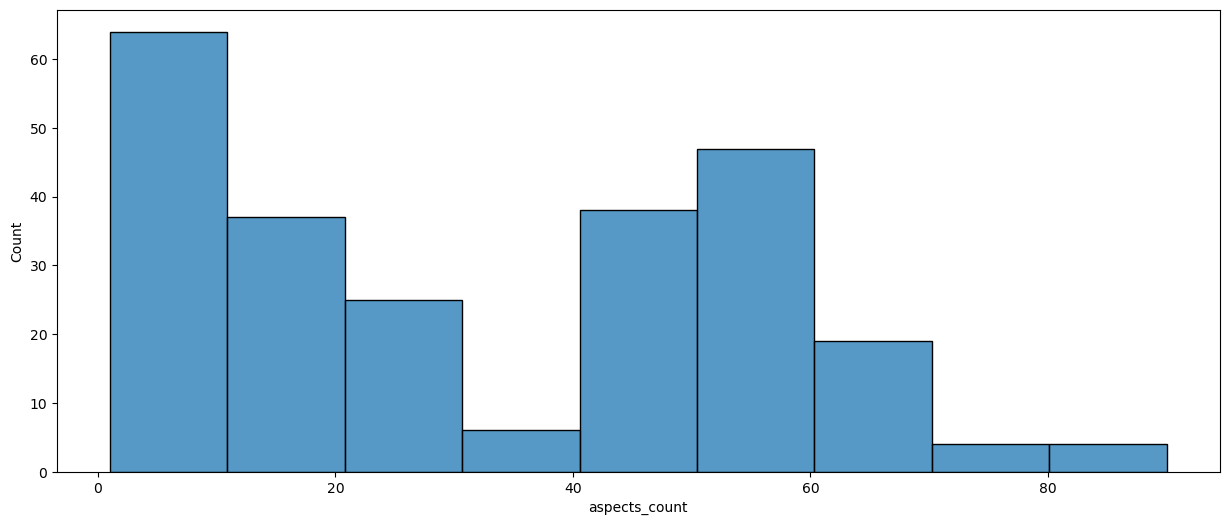

In [24]:
sns.histplot(data=freq_df, x="aspects_count")


In [25]:
freq_df['aspects_count'].mean()

32.545081967213115

In [26]:
freq_df['aspects_count'].median()

27.0

**The most frequent aspects**

In [27]:
df.head()

,taskId,aspectId,name,description,categoryId,type,groupId
0,arpZLB27MYq9MWTotPuJAy,7891,contains too little/1223,You mentioned not enough statements.,NaN,MISCONCEPTION,NaN
1,arpZLB27MYq9MWTotPuJAy,7893,wrong statement/1221,This sentences doesn't refer to the impact sta...,NaN,MISCONCEPTION,NaN
2,arpZLB27MYq9MWTotPuJAy,7892,correct statement/1220,You correctly identified the impact statement.,NaN,CONCEPT,NaN
3,RfcCuYoNUe7RBgytJfh1F,7979,contains too little/1461,You mentioned the importance of giving praise....,NaN,MISCONCEPTION,NaN
4,RfcCuYoNUe7RBgytJfh1F,7980,correct statement/1459,Praise is the recognition for doing good work.,NaN,CONCEPT,NaN


<Axes: xlabel='aspectId', ylabel='Count'>

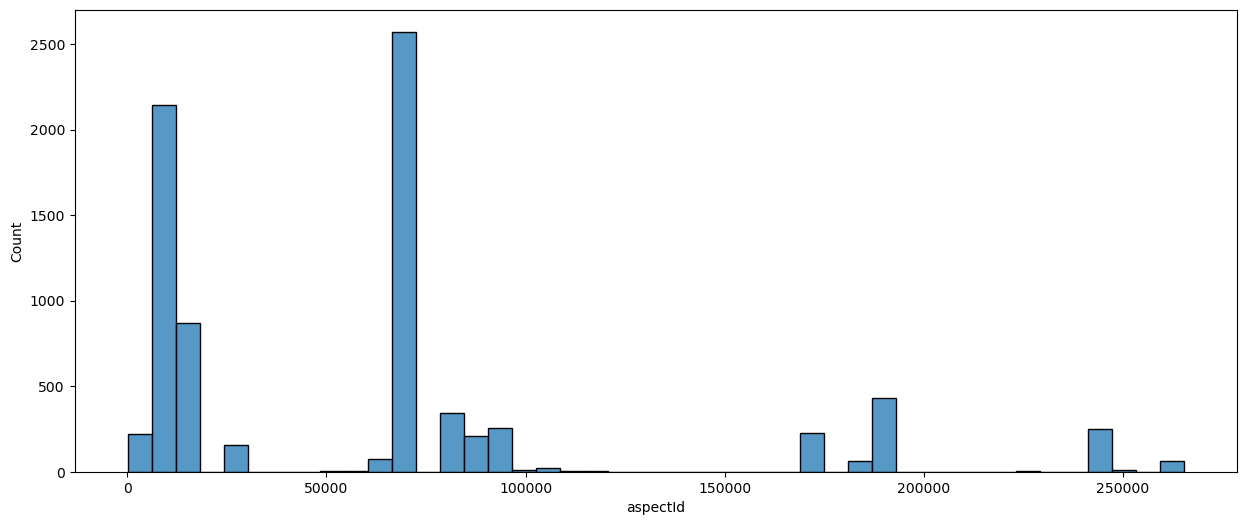

In [28]:
sns.histplot(data=df, x="aspectId")

**Co-occurrence**

In [44]:
occ_df = df[["taskId", "aspectId"]].groupby(by="taskId")["aspectId"].apply(list).reset_index().rename(columns={"aspectId":"aspectIds"})
occ_df.head()

,taskId,aspectIds
0,11TmPwiOxTraHRLHAisXsd,"[81254, 223298, 81242, 92638, 92639, 92640, 10..."
1,1293GBkjDYEaXvgdCO44iO,"[71033, 71034]"
2,13UI7608E2c6uSrPNzIeD8,"[114630, 184384, 114567, 184389, 184394, 11454..."
3,14z4iMHY2C59ksyPre5OWh,"[6095, 6096, 6097, 6098, 6099, 6100, 6101, 624..."
4,15lJTTd7ChCah9fCEQs7Sk,"[1415, 1631, 1417, 1416, 1418, 1419, 1632, 161..."
